# Hybrid Mutual Fund Analysis:

We are analysing various parameters related to the Hybrid Mutual fund dataset and find distinction between good and bad schemes

***Mutual funds are subject to market risk*** 

In [1]:
import pandas as pd              
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sb 

%matplotlib inline


In [2]:
data=pd.read_excel("HMF.xlsx") 

In [3]:
data.head()   

,Fund_Scheme_Name,Category,Launch_Date,Crisil_Rating,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,Risk,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
0,UTI Arbitrage Fund,Arbitrage,2006-06-29,Rank 1,1397.70,6.52,6.24,6.60,Moderately Low,0.83,-0.03,-0.04,0.60,0.33,0.45,0.00,13,7.40,0
1,LIC MF Debt Hybrid Fund,Conservative,2003-06-02,Rank 1,84.93,7.68,5.92,6.55,Moderate,2.30,-0.08,-0.12,-1.91,0.58,3.07,62.19,16,7.73,0
2,ICICI Prudential Regular Savings Fund,Conservative,2004-03-30,Rank 1,1589.42,8.40,9.33,9.92,Moderately High,2.24,0.84,1.36,1.91,1.58,3.57,88.45,15,10.06,1
3,Reliance Arbitrage Fund,Arbitrage,2010-10-14,Rank 2,8535.00,6.64,6.41,6.86,Moderately Low,1.04,0.26,0.45,0.70,1.30,0.54,85.00,8,17.83,1
4,Kotak Equity Arbitrage Fund,Arbitrage,2005-09-29,Rank 2,13360.00,6.56,6.32,6.75,Moderately Low,0.97,0.14,0.23,0.56,1.26,0.45,87.45,13,18.45,1


In [4]:
data.describe()  


,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4523.254637,7.257000,7.685000,8.346333,1.718333,0.165000,0.263000,0.331333,1.437667,4.792667,61.608333,15.266667,11.528333,0.466667
std,7952.466690,1.567997,1.924327,1.832329,0.575243,0.362717,0.612063,1.568361,1.217682,3.690865,38.442155,4.961461,4.102575,0.507416
min,12.230700,4.830000,5.740000,6.250000,0.750000,-0.670000,-1.180000,-2.450000,-0.690000,0.440000,0.000000,5.000000,6.650000,0.000000
25%,113.197500,6.127500,6.217500,6.667500,1.017500,-0.007500,-0.010000,-1.082500,0.587500,0.587500,32.210000,12.250000,7.512500,0.000000
50%,1488.350000,6.965000,6.860000,7.935000,1.855000,0.240000,0.380000,0.580000,0.995000,4.050000,85.050000,15.000000,10.225000,0.000000
75%,4350.500000,8.385000,8.720000,9.470000,2.197500,0.327500,0.550000,1.360000,2.310000,8.495000,89.907500,18.750000,14.357500,1.000000
max,30028.000000,10.610000,11.460000,12.000000,2.400000,0.840000,1.360000,3.980000,3.920000,11.740000,96.810000,26.000000,19.860000,1.000000


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fund_Scheme_Name  30 non-null     object        
 1   Category          30 non-null     object        
 2   Launch_Date       30 non-null     datetime64[ns]
 3   Crisil_Rating     30 non-null     object        
 4   Net_Assets_(Cr)   30 non-null     float64       
 5   1_Yr_Return       30 non-null     float64       
 6   3_Yr_Return       30 non-null     float64       
 7   5_Yr_Return       30 non-null     float64       
 8   Risk              30 non-null     object        
 9   Expense_Ratio     30 non-null     float64       
 10  Sharpe_Ratio      30 non-null     float64       
 11  Sortino_Ratio     30 non-null     float64       
 12  Alpha             30 non-null     float64       
 13  Beta              30 non-null     float64       
 14  Std_Dev           30 non-nul

In [6]:
data.skew()

Net_Assets_(Cr)    2.320185
1_Yr_Return        0.596719
3_Yr_Return        0.983600
5_Yr_Return        0.756581
Expense_Ratio     -0.579551
Sharpe_Ratio      -0.574800
Sortino_Ratio     -0.583262
Alpha             -0.014383
Beta               0.657854
Std_Dev            0.285394
R_Squared         -0.832263
Year_Trailing     -0.137841
Net_Return         0.463050
Good               0.140769
dtype: float64

### 1-3-5 Year returns:
     Return' is the yield that an investment generates over a period of time. It is the percentage increase or decrease in the value of the investment in that period.

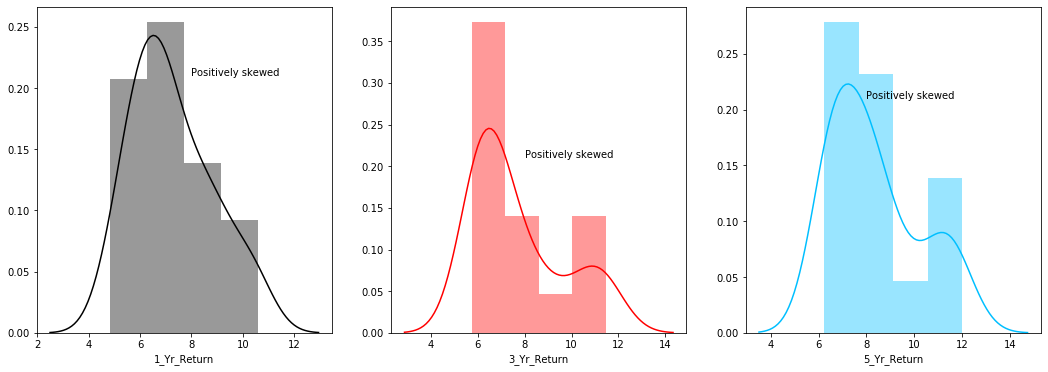

In [8]:
# Plotting graphs for 1 year return,3 year return and 5 year return
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sb.distplot(data['1_Yr_Return'], ax=ax[0], color='black')
ax[0].text(8.0,0.21,"Positively skewed")

sb.distplot(data['3_Yr_Return'], ax=ax[1], color='red')
ax[1].text(8.0,0.21,"Positively skewed")

sb.distplot(data['5_Yr_Return'], ax=ax[2], color='deepskyblue')
ax[2].text(8.0,0.21,"Positively skewed")

plt.rcParams['font.size'] = 12  # setting font size

###  Expense ratio:
       The expense ratio of a stock or asset fund is the total percentage of fund assets used for administrative, management, advertising, and all other expenses.
       
### Sharpe ratio:
        The Sharpe ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
        
### Sortino ratio:
        It measures the risk-adjusted returns of a given scheme. The Sortino ratio is the excess return over the risk-free rate divided by the asset's downside deviation, and so it measures the return to "bad" volatility. The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns, called downside deviation, instead of the total standard deviation of portfolio returns.

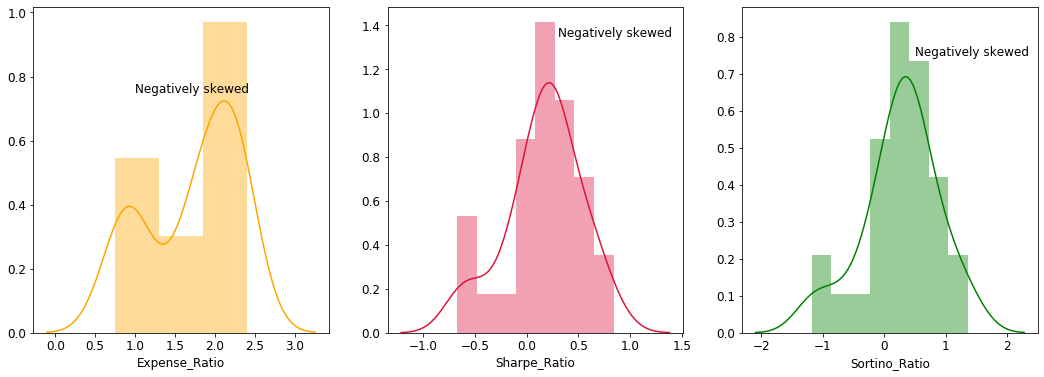

In [9]:
# Plotting graphs for Expense ratio,sharp_ratio and sortino ratio
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sb.distplot(data['Expense_Ratio'], ax=ax[0], color='orange')
ax[0].text(1.0,0.75,"Negatively skewed")

sb.distplot(data['Sharpe_Ratio'], ax=ax[1], color='crimson')
ax[1].text(0.3,1.35,"Negatively skewed")

sb.distplot(data['Sortino_Ratio'], ax=ax[2], color='green')
ax[2].text(0.5,0.75,"Negatively skewed")

plt.rcParams['font.size'] = 12

### Alpha:
       Alpha tells you whether that fund has produced returns justifying the risks it is taking by comparing its actual return to the one 'predicted' by the beta.
       
### Beta:
       Beta is a measure of a stock's volatility in relation to the market. By definition, the market has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market. A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide a potential for higher returns; low-beta stocks pose less risk but also lower returns.
       
### Standard Deviation:
     Standard deviation is a statistical measurement that shows how much variation there is from the arithmetic mean (simple average). A greater standard deviation indicates higher volatility, which means the mutual fund's performance fluctuated high above the average but also significantly below it.
     
### R-squared
     R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are in relation to a benchmark. Used together, R-squared and beta give investors a thorough picture of the performance of asset managers.

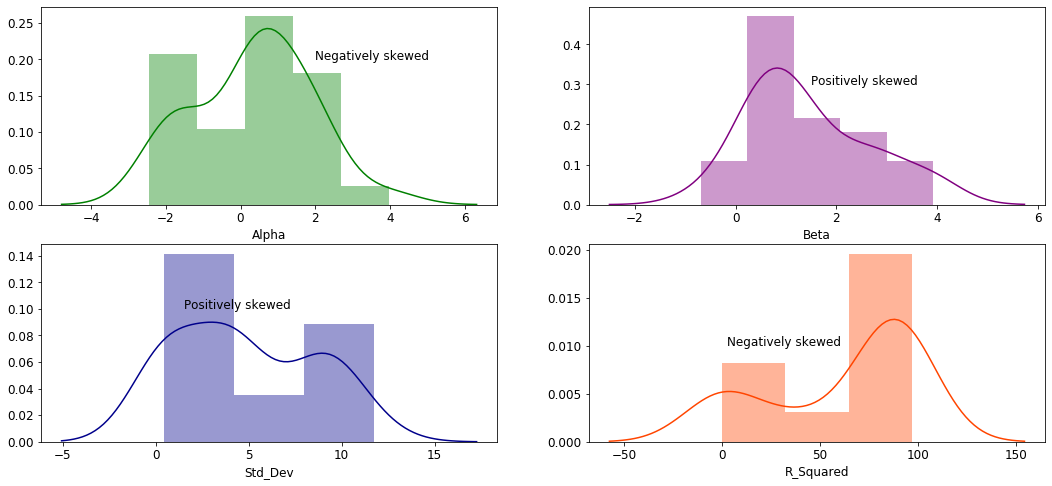

In [10]:
# Plotting graphs for alpha,beta std-dev and R-squared values
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
sb.distplot(data['Alpha'], ax=ax[0,0], color='green')
ax[0,0].text(2.0,0.20,"Negatively skewed")

sb.distplot(data['Beta'], ax=ax[0,1], color='purple')
ax[0,1].text(1.5,0.30,"Positively skewed")

sb.distplot(data['Std_Dev'], ax=ax[1,0], color='darkblue')
ax[1,0].text(1.5,0.10,"Positively skewed")

sb.distplot(data['R_Squared'], ax=ax[1,1], color='orangered')
ax[1,1].text(2.5,0.01,"Negatively skewed")

plt.rcParams['font.size'] = 12

In [12]:
X=data['Fund_Scheme_Name'] 
Y=data['Category']          
X.head()

0                       UTI Arbitrage Fund #
1                  LIC MF Debt Hybrid Fund #
2    ICICI Prudential Regular Savings Fund #
3                  Reliance Arbitrage Fund #
4              Kotak Equity Arbitrage Fund #
Name: Fund_Scheme_Name, dtype: object

In [13]:
Y.head()

0        Arbitrage
1    Conservative 
2    Conservative 
3        Arbitrage
4        Arbitrage
Name: Category, dtype: object

### Comparing 1yr,3yr and 5 yr returns

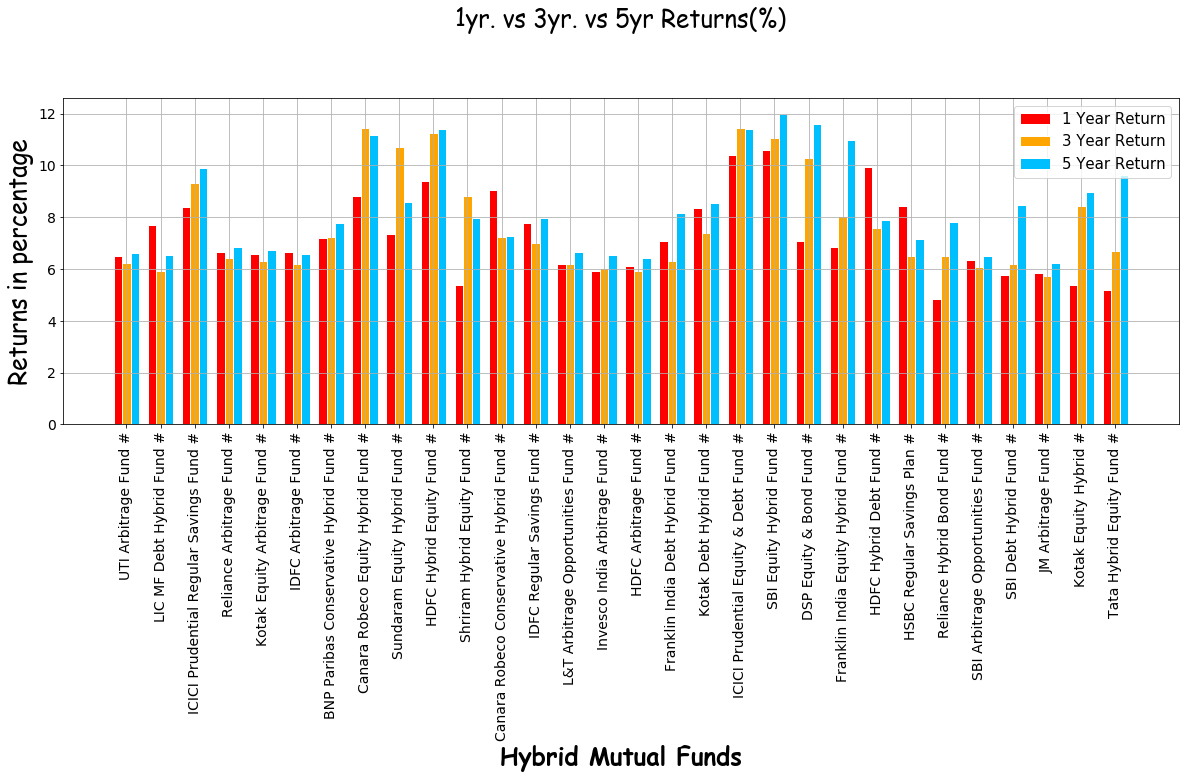

In [23]:
barWidth = 0.25
labels=['1 Year Return', '3 Year Return', '5 Year Return']

X = data['Fund_Scheme_Name']
Y1 = data['1_Yr_Return']
Y2 = data['3_Yr_Return']
Y3 = data['5_Yr_Return']
 
# Set position of bar on X axis
r1 = np.arange(len(Y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Y1, color='red', width=0.25, edgecolor='white', label='var1')
plt.bar(r2, Y2, color='orange', width=0.25, edgecolor='white', label='var2')
plt.bar(r3, Y3, color='deepskyblue', width=0.25, edgecolor='white', label='var3')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Y1))], X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('1yr. vs 3yr. vs 5yr Returns(%)', y=1.20, fontsize='24', fontname="Comic Sans MS")
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

### NET RETURNS:

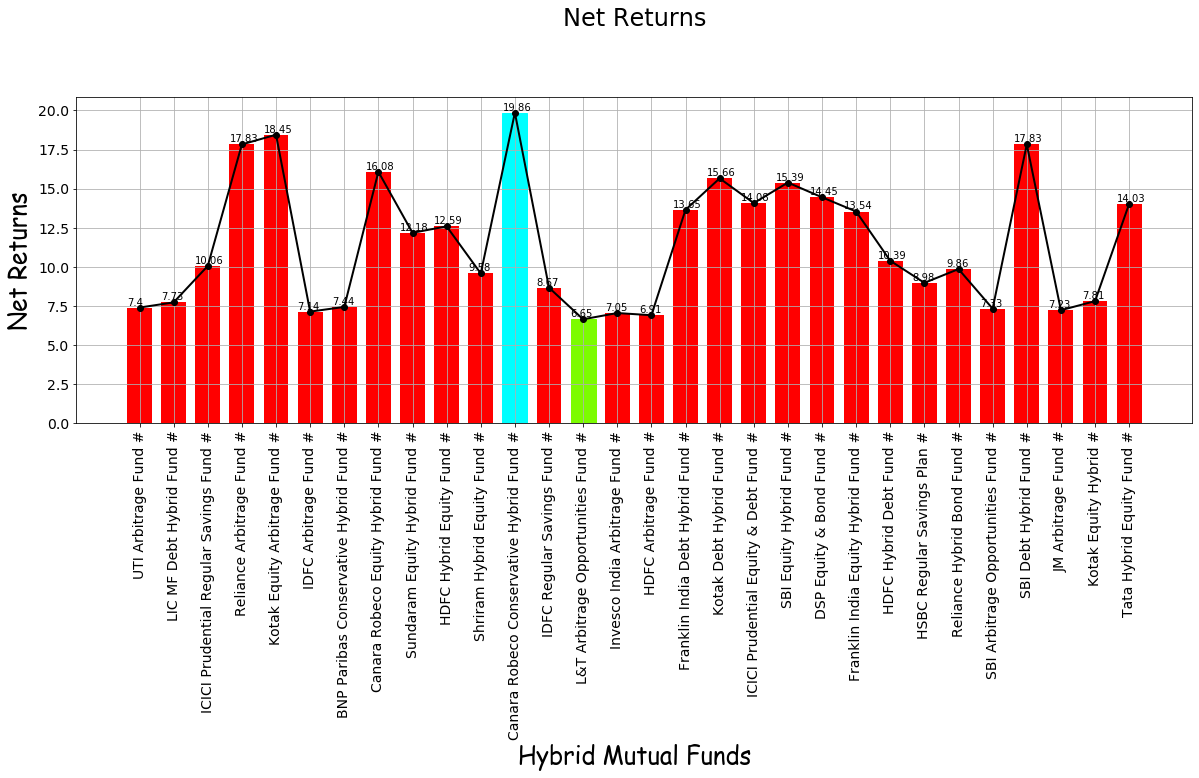

In [40]:
Y=data['Net_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='red', width=0.73)
bars[11].set_color('aqua')
bars[13].set_color('lawngreen')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Net Returns', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

### Goodscheme parameters:

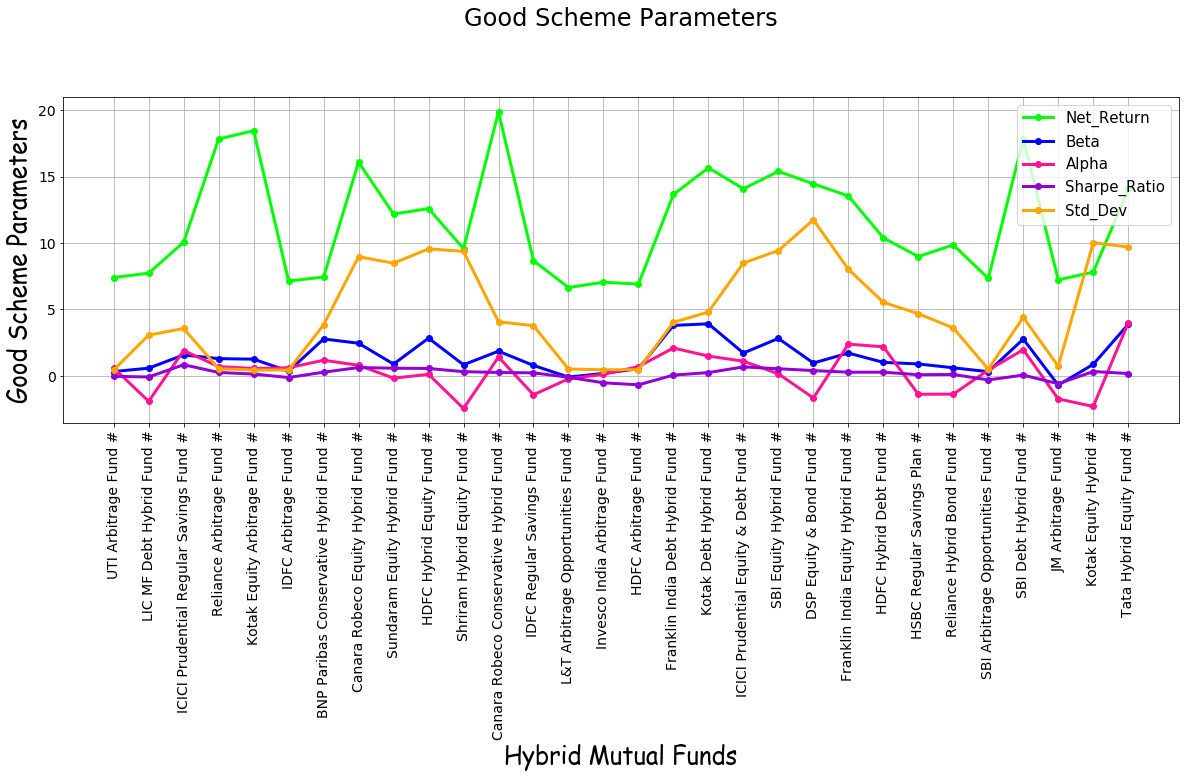

In [41]:
X=data['Fund_Scheme_Name']
#Y1=data['R_Squared']
Y2=data['Net_Return']
Y3=data['Beta']
Y4=data['Alpha']
Y5=data['Sharpe_Ratio']
Y6=data['Std_Dev']

#labels=['R_Squared', 'Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev']
labels=['Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev']
#lines=plt.plot(X, Y1, linewidth='3.0', color='red', marker='o', markersize='6')
lines=plt.plot(X, Y2, linewidth='3.0', color='lime', marker='o', markersize='6')
lines=plt.plot(X, Y3, linewidth='3.0', color='blue', marker='o', markersize='6')
lines=plt.plot(X, Y4, linewidth='3.0', color='deeppink', marker='o', markersize='6')
lines=plt.plot(X, Y5, linewidth='3.0', color='darkviolet', marker='o', markersize='6')
lines=plt.plot(X, Y6, linewidth='3.0', color='orange', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Good Scheme Parameters', fontsize=24, fontname="Comic Sans MS" )
plt.title('Good Scheme Parameters', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()
'''
for i,j in zip(X,Y1):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y2):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y3):
    plt.annotate(str(j),xy=(i,j))
'''
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()


##### Good scheme parameters for the Net returns is high in most cases!

### Distinction between Good and bad schemes:



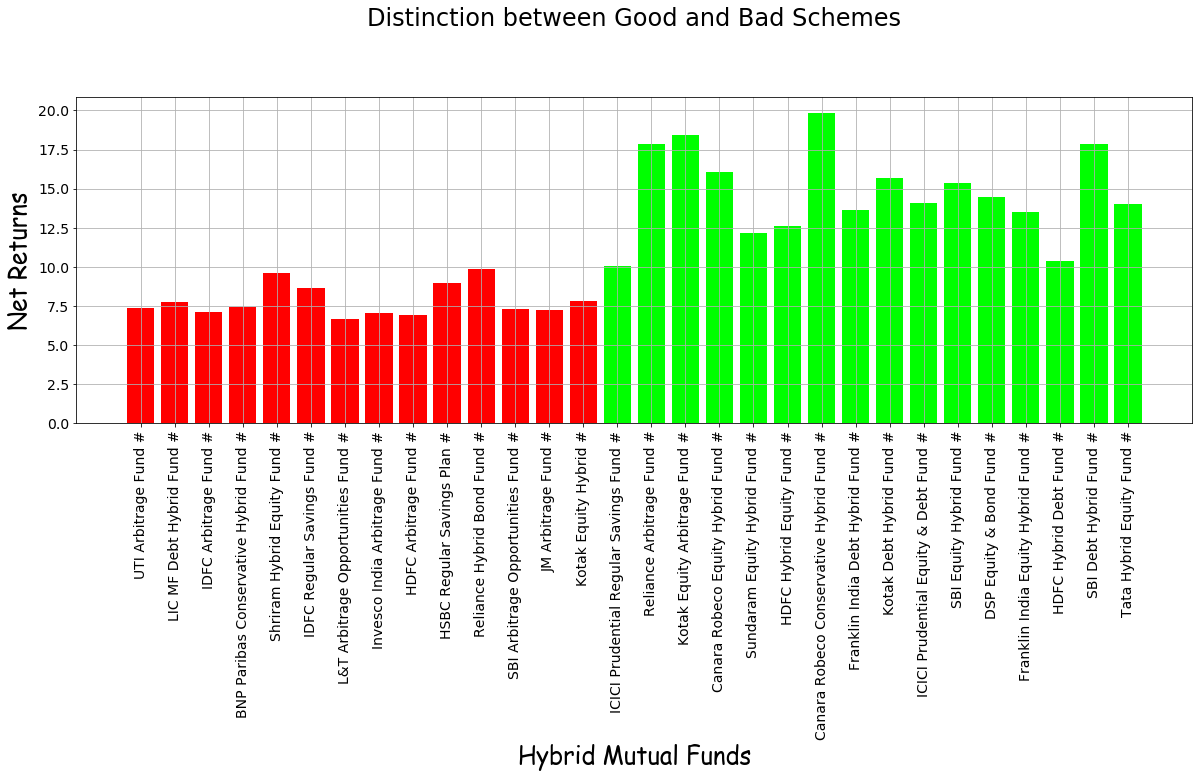

In [43]:
X = data['Fund_Scheme_Name']
Y = data['Net_Return']

mask1 = Y < 10.0
mask2 = Y >= 10.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

In [48]:
# Filtering good and bad based on following conditions
# R_squared>85
# Net_Returns>=10
# Beta>=1
# Alpha>0
# Sharpe_Ratio>0
# Std_Dev<15

for index, row in data.iterrows():
    A=row['Fund_Scheme_Name']
    B=row['R_Squared']
    C=row['Net_Return']
    D=row['Beta']
    E=row['Alpha']
    F=row['Sharpe_Ratio']
    G=row['Std_Dev']
     
    if (B>=85 and C>=10 and D>=1 and E>0 and F>0 and G<15):     
        print(A)
        data.loc[index, 'Good'] = 1
    else:
        data.loc[index, 'Good'] = 0

ICICI Prudential Regular Savings Fund #
Reliance Arbitrage Fund #
Kotak Equity Arbitrage Fund #
Canara Robeco Equity Hybrid Fund #
HDFC Hybrid Equity Fund #
Canara Robeco Conservative Hybrid Fund #
Franklin India Debt Hybrid Fund #
Kotak Debt Hybrid Fund #
ICICI Prudential Equity & Debt Fund #
SBI Equity Hybrid Fund #
Franklin India Equity Hybrid Fund #
HDFC Hybrid Debt Fund #
SBI Debt Hybrid Fund #
Tata Hybrid Equity Fund #


In [49]:
data.head()  #good coloumn added

,Unnamed: 0,Sl_No.,Fund_Scheme_Name,Category,Launch_Date,Crisil_Rating,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,...,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
0,0,1,UTI Arbitrage Fund #,Arbitrage,2006-06-29,Rank 1,1397.70,6.52,6.24,6.60,...,0.83,-0.03,-0.04,0.60,0.33,0.45,0.00,13,7.40,0
1,1,2,LIC MF Debt Hybrid Fund #,Conservative,2003-06-02,Rank 1,84.93,7.68,5.92,6.55,...,2.30,-0.08,-0.12,-1.91,0.58,3.07,62.19,16,7.73,0
2,2,3,ICICI Prudential Regular Savings Fund #,Conservative,2004-03-30,Rank 1,1589.42,8.40,9.33,9.92,...,2.24,0.84,1.36,1.91,1.58,3.57,88.45,15,10.06,1
3,3,4,Reliance Arbitrage Fund #,Arbitrage,2010-10-14,Rank 2,8535.00,6.64,6.41,6.86,...,1.04,0.26,0.45,0.70,1.30,0.54,85.00,8,17.83,1
4,4,5,Kotak Equity Arbitrage Fund #,Arbitrage,2005-09-29,Rank 2,13360.00,6.56,6.32,6.75,...,0.97,0.14,0.23,0.56,1.26,0.45,87.45,13,18.45,1


In [50]:
category=data['Good'].unique().tolist()
# converin categories to list
category_frequency = data['Good'].value_counts().to_dict()
# converting category_frequency to dictionary

count = category_frequency.values()
#print(count)

def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list          # returns list
      
category_count=getList(category_frequency)

### Percentage of Good and Bad schemes:

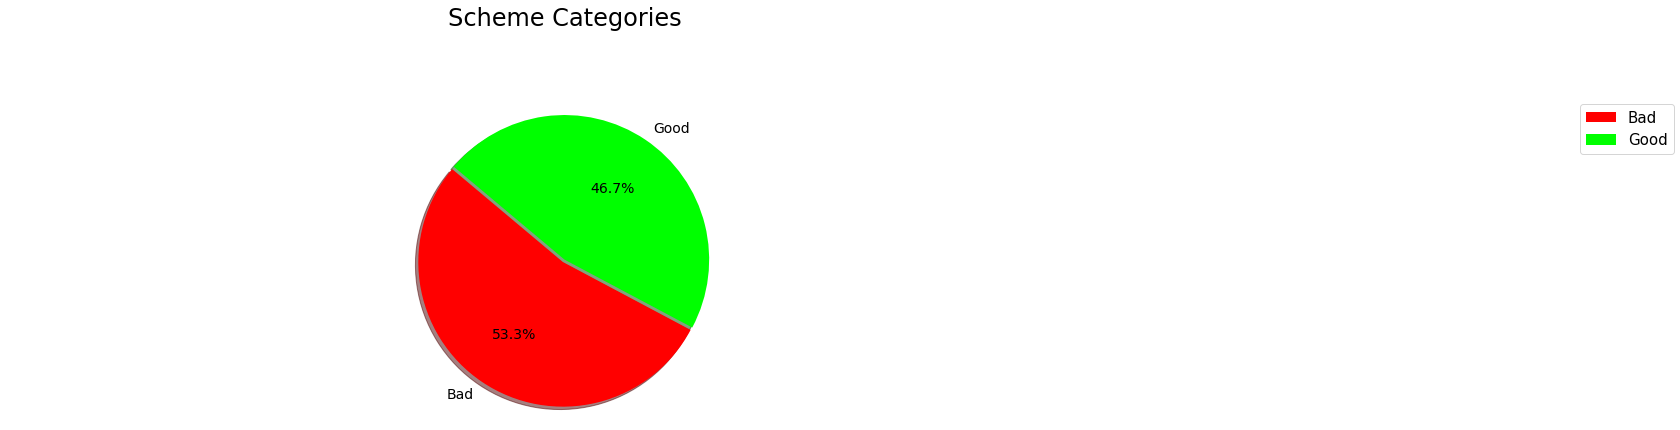

In [51]:
labels = ['Bad', 'Good']
colors = ['red', 'lime']
explode = (0.01, 0.01)  


plt.pie(category_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.5,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size'] = 20
plt.show()

#### 53.3% of the schemes are bad!